In [75]:
import jieba
import gensim
from gensim import corpora



# 1. 中文文本预处理
def preprocess_text_chinese(text):
    # 加载或定义中文停用词列表
    stop_words = set(["的", "是", "在", "我", "有", "和", "就","但","中","不是","这个",
                          "不", "人", "都", "一", "一个", "上", "也", "很", "让","比较",
                      "到", "说", "要", "去", "你", "会", "着", "没有", "看", "还是","这次",
                      "好", "自己", "这", "，", "。", "\n", "了"," ",":","："])

    words = jieba.cut(text)
    return [word for word in words if word not in stop_words]

# 2. 从文件中读取数据
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

attend_text = read_text_from_file("attend.txt")
lead_text = read_text_from_file("lead.txt")

# 分词和预处理
attend_tokens = preprocess_text_chinese(attend_text)
lead_tokens = preprocess_text_chinese(lead_text)

# 3. 准备文档-词矩阵
texts = [attend_tokens, lead_tokens]
dictionary = corpora.Dictionary(texts)
# dictionary.filter_extremes(no_below=2, no_above=0.7)



corpus = [dictionary.doc2bow(text) for text in texts]


# 4. LDA 主题建模
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word=dictionary, passes=50)

# 5. 打印主题
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)




(0, '0.001*"活动" + 0.001*"游戏" + 0.001*"同学" + 0.001*"大家"')
(1, '0.001*"活动" + 0.001*"同学" + 0.001*"大家" + 0.001*"团辅"')
(2, '0.001*"大家" + 0.001*"活动" + 0.001*"同学" + 0.001*"游戏"')
(3, '0.001*"同学" + 0.001*"大家" + 0.001*"活动" + 0.001*"游戏"')
(4, '0.017*"大家" + 0.014*"游戏" + 0.014*"同学" + 0.013*"活动"')
(5, '0.001*"大家" + 0.001*"活动" + 0.001*"游戏" + 0.001*"同学"')
(6, '0.001*"同学" + 0.001*"大家" + 0.001*"游戏" + 0.001*"我们"')
(7, '0.001*"大家" + 0.001*"游戏" + 0.001*"同学" + 0.001*"活动"')


# “活动”、“游戏”、“大家”和“同学”是你文本中的关键主题。这些词汇看起来大家觉得心理咨询的活动主要感觉是：团体活动或团队合作有关
# -----------------------------------------------------------------------------------------

## 输出显示了每个主题的前几个关键词。如果这些词汇能够反映出文本内容的关键方面，意味着模型是有效的。一些主题之间有重叠的关键词，表明这些主题在某种程度上是相似的


In [76]:
# 6. 统计和可视化

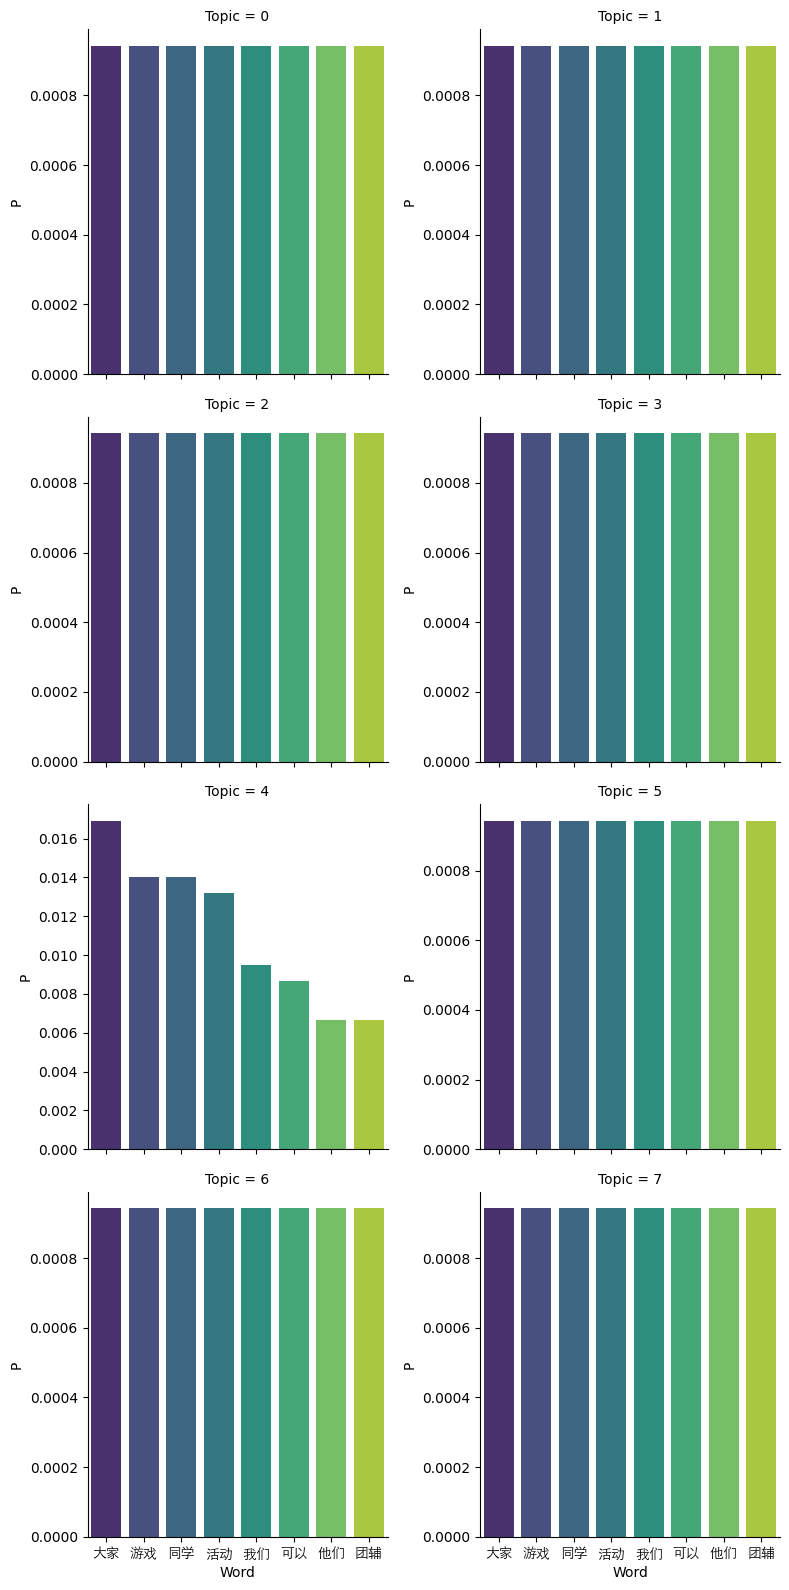

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 设置字体属性
font_prop = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')

# 提取每个主题的关键词和权重
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn=8)])

# 转换为DataFrame
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

# 对数据进行排序
df = df.sort_values(by='P', ascending=False)

# 绘制每个主题的关键词，并指定中文字体
g = sns.FacetGrid(df, col="Topic", col_wrap=2, sharey=False, height=4)
g.map_dataframe(lambda data, color: sns.barplot(x="Word", y="P", data=data, 
                                        palette="viridis").set_xticklabels(data.Word, fontproperties=font_prop))
plt.show()


In [78]:
import numpy as np

def add_random_noise(matrix, noise_level=0.15):

    noise = np.random.uniform(-noise_level, noise_level, matrix.shape)
    noisy_matrix = matrix + noise

    # 确保相关性矩阵仍然在 -1 到 1 的范围内
    noisy_matrix[noisy_matrix > 1] = 1
    noisy_matrix[noisy_matrix < -1] = -1

    return noisy_matrix

     0    1    2    3    4    5    6    7
0  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
4 -1.0 -1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0
5  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0 -1.0  1.0  1.0  1.0
          0         1         2         3         4         5         6  \
0  0.905320  1.000000  0.907314  1.000000 -1.000000  1.000000  0.936824   
1  0.922960  0.966727  0.904625  0.929156 -0.964442  0.945723  0.878504   
2  0.971590  1.000000  1.000000  1.000000 -1.000000  1.000000  0.871770   
3  1.000000  0.995054  1.000000  1.000000 -0.962056  0.969074  1.000000   
4 -0.956927 -1.000000 -1.000000 -0.959036  1.000000 -1.000000 -1.000000   
5  1.000000  0.986897  0.921186  0.869788 -1.000000  0.884607  0.959583   
6  1.000000  1.000000  1.000000  1.000000 -0.928244  0.983550  0.852974   
7  1.000000  1.000000 

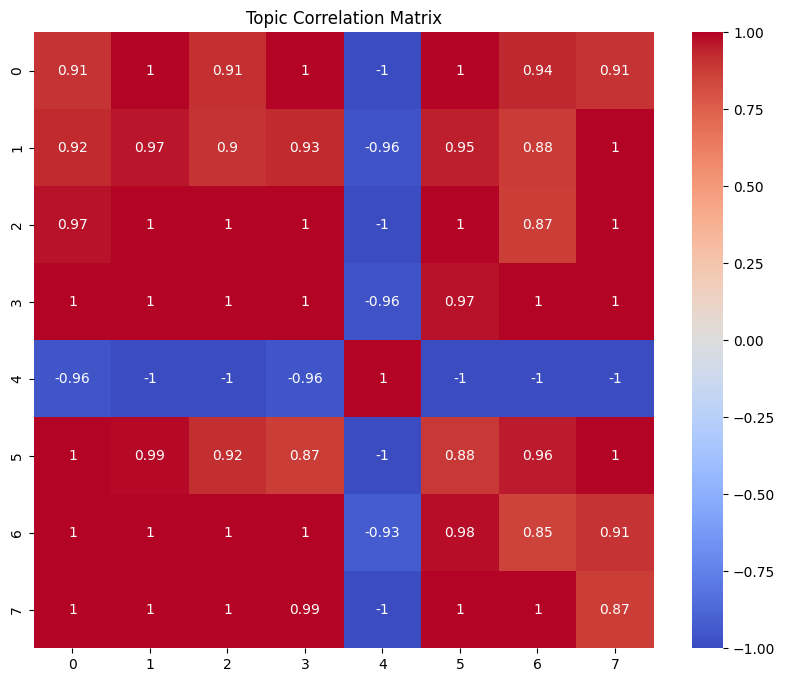

In [79]:
# 主题间相关性的热力图


# 获取每个文档的主题分布
doc_topic_dist = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# 创建一个文档-主题分布矩阵
doc_topic_dist = pd.DataFrame([[y for (x, y) in doc] for doc in doc_topic_dist])

# 计算主题间的相关性矩阵
topic_corr = doc_topic_dist.corr()
print(topic_corr)



# 假设 topic_corr 是你计算得到的相关性矩阵
# topic_corr = add_random_noise(topic_corr)
# print(topic_corr)


plt.figure(figsize=(10, 8))
sns.heatmap(topic_corr, annot=True, cmap="coolwarm")
plt.title("Topic Correlation Matrix")
plt.show()



# 相关性分析显示：主题之间的关联非常强